# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [192]:
# Import the appropriate libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot') #ggplot is a Python implementation of the grammar of graphics.
plt.rcParams['figure.figsize'] = (10,8)

# Create two new dataframes
north_df=pd.read_csv("NorthCallCenter.csv")
south_df=pd.read_csv("SouthCallCenter.csv")

In [145]:
north_df.head()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1


In [146]:
south_df.head()
#

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1


## Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, make sure you answer the following questions:

1. How many reps are in each branch?
2. What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for each branch?
3. What is the number of calls taken for each time block?

In [147]:
### EDA 1) How many reps are in each branch?

north_number_reps=north_df["Rep ID"].value_counts().count() 
#north_number_reps = north["Rep ID"].nunique()
#north_reps = len(north_df["Rep ID"].value_counts())
#north_rep = north_df['Rep ID'].describe()
# north_df['Rep ID'].drop_duplicates().count()
# north_df.value_counts('Rep ID').count()
north_number_reps

9

In [148]:
south_number_reps=south_df["Rep ID"].value_counts().count()
#south_number_reps = north["Rep ID"].nunique()
south_number_reps

11

In [149]:
### EDA 2)What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for each branch?

#You may use describe() to see mean() or you may calculate mean() for more than one column at once.

north_df.describe()
#north_agg = north_df.agg('mean')

,Unnamed: 0,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
count,245.000000,245.000000,245.000000,245.000000,245.000000,82.000000,245.000000,245.0
mean,122.000000,0.020408,0.028571,9.987755,1.914286,3.048780,2.967347,1.0
std,70.869599,0.141681,0.166940,1.403980,0.771416,1.456382,0.843827,0.0
min,0.000000,0.000000,0.000000,8.000000,1.000000,1.000000,2.000000,1.0
25%,61.000000,0.000000,0.000000,9.000000,1.000000,2.000000,2.000000,1.0
50%,122.000000,0.000000,0.000000,10.000000,2.000000,3.000000,3.000000,1.0
75%,183.000000,0.000000,0.000000,11.000000,3.000000,4.000000,4.000000,1.0
max,244.000000,1.000000,1.000000,12.000000,3.000000,5.000000,4.000000,1.0


In [150]:
south_df.describe()

,Unnamed: 0,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
count,314.000000,314.000000,314.000000,314.00000,314.000000,126.000000,314.000000,314.0
mean,156.500000,0.035032,0.012739,10.05414,1.910828,3.000000,3.076433,1.0
std,90.788215,0.184154,0.112324,1.40751,0.860016,1.308434,0.819424,0.0
min,0.000000,0.000000,0.000000,8.00000,1.000000,1.000000,2.000000,1.0
25%,78.250000,0.000000,0.000000,9.00000,1.000000,2.000000,2.000000,1.0
50%,156.500000,0.000000,0.000000,10.00000,2.000000,3.000000,3.000000,1.0
75%,234.750000,0.000000,0.000000,11.00000,3.000000,4.000000,4.000000,1.0
max,313.000000,1.000000,1.000000,12.00000,3.000000,5.000000,4.000000,1.0


In [151]:
north_df[["Busy Minutes","Not Ready Minutes","Incoming Wait Time","During Call Wait Time"]].mean()
# north_df[['Busy Minutes', 'Not Ready Minutes', 'Incoming Wait Time', 'During Call Wait Time']].mean().to_frame(name="N: Avg.")

Busy Minutes             9.987755
Not Ready Minutes        1.914286
Incoming Wait Time       3.048780
During Call Wait Time    2.967347
dtype: float64

In [152]:
south_df[["Busy Minutes","Not Ready Minutes","Incoming Wait Time","During Call Wait Time"]].mean()

Busy Minutes             10.054140
Not Ready Minutes         1.910828
Incoming Wait Time        3.000000
During Call Wait Time     3.076433
dtype: float64

3. The number of calls taken for each time block

In [153]:
### EDA 3) What is the number of calls taken for each time block?
north_calls_per_time_block=north_df["Time Block"].value_counts()
north_calls_per_time_block
# north_df[['Time Block', 'Calls']].groupby('Time Block').count()
# north_df['Time Block'].value_counts().to_frame(name="N: Time Block")

12:00 PM    45
10:00 AM    43
2:00 PM     35
3:00 PM     30
4:00 PM     28
11:00 AM    25
1:00 PM     17
5:00 PM     17
9:00 AM      5
Name: Time Block, dtype: int64

In [154]:
south_calls_per_time_block=south_df["Time Block"].value_counts()
south_calls_per_time_block

12:00 PM    75
10:00 AM    56
3:00 PM     43
11:00 AM    31
2:00 PM     30
5:00 PM     26
4:00 PM     25
1:00 PM     23
9:00 AM      5
Name: Time Block, dtype: int64

### EDA Results

Make note of your results here!

1. How many reps are in each branch? 

   9 in North and 11 in South
2. What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for each branch?

                            North Branch:            South Branch:
   
       Busy Minutes             9.987755             10.054140
   
       Not Ready Minutes        1.914286             1.910828
   
       Incoming Wait Time       3.048780             3.000000             
              
   
       During Call Wait Time    2.967347             3.076433
   
 
3. What is the number of calls taken for each time block?

                          North Branch:   South Branch:
                          
                12:00 PM        45             75
                10:00 AM        43             56
                2:00 PM         35             30
                3:00 PM         30             43
                4:00 PM         28             25
                11:00 AM        25             31
                1:00 PM         17             23
                5:00 PM         17             26
                9:00 AM          5              5


## Cleaning Data

Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets:

1. Incoming wait time is null in many places. Do all of those places correspond to outgoing calls?
2. In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
3. Are there duplicates in the two data sets? If there are, how did you handle them?
4. Is any of the data in the two data sets unnecessary? If yes, how did you handle it?

In [155]:
### 1)Incoming wait time is null in many places. Do all of those places correspond to outgoing calls?

north_df["Incoming or Outgoing"].value_counts()

Outgoing    163
Incoming     82
Name: Incoming or Outgoing, dtype: int64

In [156]:
north_df.groupby(["Incoming or Outgoing"])["Incoming Wait Time"].value_counts(dropna=False)


# north_null_icw = north_df[north_df["Incoming Wait Time"].isnull()] 

# north_info = north_null_icw["Incoming or Outgoing"].value_counts() 

Incoming or Outgoing  Incoming Wait Time
Incoming              4.0                    20
                      1.0                    17
                      5.0                    17
                      2.0                    16
                      3.0                    12
Outgoing              NaN                   163
Name: Incoming Wait Time, dtype: int64

In [157]:
south_df["Incoming or Outgoing"].value_counts()

Outgoing    188
Incoming    126
Name: Incoming or Outgoing, dtype: int64

In [158]:
south_df.groupby(["Incoming or Outgoing"])["Incoming Wait Time"].value_counts(dropna=False)

Incoming or Outgoing  Incoming Wait Time
Incoming              4.0                    30
                      3.0                    29
                      2.0                    28
                      1.0                    20
                      5.0                    19
Outgoing              NaN                   188
Name: Incoming Wait Time, dtype: int64

In [159]:
### 2) In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
north_df["Sale"].value_counts()

NO      234
YES      10
YES       1
Name: Sale, dtype: int64

In [160]:
north_df["Sale"].loc[north_df["Sale"]=="YES "]



19    YES 
Name: Sale, dtype: object

In [161]:
new_yes=north_df["Sale"].str.replace("YES ","YES")
north_df["Sale"]=new_yes
north_df["Sale"].value_counts()
# north_df['Sale'] =north_df['Sale'].str.strip()

NO     234
YES     11
Name: Sale, dtype: int64

In [162]:
### 3) Are there duplicates in the two data sets? If there are, how did you handle them?

north_df.duplicated().sum()
# north_df.drop_duplicates(keep = "first", inplace = False)

0

In [163]:
south_df.duplicated().sum()

0

In [164]:
### 4)Is any of the data in the two data sets unnecessary? If yes, how did you handle it?

north_df.columns

Index(['Unnamed: 0', 'Branch', 'Call Purpose', 'Time Block',
       'Incoming or Outgoing', 'Queue', 'Rep ID', 'Sale', 'Lost Call',
       'Abandoned', 'Busy Minutes', 'Not Ready Minutes', 'Incoming Wait Time',
       'During Call Wait Time', 'Calls'],
      dtype='object')

In [165]:
north_df=north_df.drop(["Unnamed: 0"],axis=1)
north_df.head()

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1


In [166]:
south_df.columns

Index(['Unnamed: 0', 'Branch', 'Call Purpose', 'Time Block',
       'Incoming or Outgoing', 'Queue', 'Rep ID', 'Sale', 'Lost Call',
       'Abandoned', 'Busy Minutes', 'Not Ready Minutes', 'Incoming Wait Time',
       'During Call Wait Time', 'Calls'],
      dtype='object')

In [167]:
south_df=south_df.drop(["Unnamed: 0"],axis=1)
south_df.head()

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1


### Cleaning Data Results

Make note of your results!

1. Incoming wait time is null in many places. Do all of those places correspond to outgoing calls?

    All of the null in "Incoming Wait Time" correspond to outgoing calls.
    
    
2. In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?

    There is an extra space after the "YES " in row 19. It is changed with "YES" by replace function.
    
    
3. Are there duplicates in the two data sets? If there are, how did you handle them?

    There are not any duclicated value in both data set.
    
    
4. Is any of the data in the two data sets unnecessary? If yes, how did you handle it?

    The column "Unnamed: 0" is dropped from both data sets because it has no information and is not used in any analysis..

## Data Manipulation

Before you begin answering any questions, combine the two datasets together to create a third dataframe called `df`. You can use this third dataframe to compare the two call centers to company-wide trends.

1. Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.
2. The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
3. Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?
4. For each branch and the entire company, what is the average speed of answer?

In [193]:
# combine the two datasets together to create a third dataframe called df

df=north_df.append(south_df)
#df = pd.concat([north_df, south_df])
#df.info()
df.shape


(559, 15)

In [169]:
### 1.Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.

north_df.groupby(["Rep ID"]).sum().sort_values("Calls",ascending=False)
#df.groupby(["Branch","Rep ID"]).aggregate({"Calls":"sum"}).sort_values(by=['Calls'])
#df.groupby(["Branch", "Rep ID"])["Calls"].sum().nlargest(2).to_frame("Highest No. of Calls")

,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
Rep ID,,,,,,,
Brent,0,1,362,71,17.0,117,37
Lilly,0,2,307,59,37.0,88,30
Duke,2,0,292,56,39.0,85,29
Todd,1,0,296,58,21.0,97,29
Joe,0,0,256,49,36.0,81,26
Cam,1,0,233,46,32.0,66,24
Xander,1,0,244,44,20.0,68,24
Amanda,0,1,229,43,12.0,60,23
Andy,0,3,228,43,36.0,65,23


In [170]:
south_df.groupby(["Rep ID"]).sum().sort_values("Calls",ascending=False)

,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
Rep ID,,,,,,,
Eric,0,0,361,54,47.0,112,35
Randy,3,1,320,66,47.0,98,33
Sandy,1,0,325,60,34.0,100,32
Helga,0,2,292,58,36.0,95,31
George,0,0,298,53,41.0,87,29
Kate,0,0,291,61,37.0,83,29
Karl,1,0,287,61,26.0,85,28
Josh,3,0,260,50,31.0,83,26
Susan,2,0,267,53,35.0,88,26


In [171]:
df.groupby(["Rep ID", "Branch"]).sum().sort_values("Calls",ascending=False)

,,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
Rep ID,Branch,,,,,,,
Brent,North,0,1,362,71,17.0,117,37
Eric,South,0,0,361,54,47.0,112,35
Randy,South,3,1,320,66,47.0,98,33
Sandy,South,1,0,325,60,34.0,100,32
Helga,South,0,2,292,58,36.0,95,31
Lilly,North,0,2,307,59,37.0,88,30
Todd,North,1,0,296,58,21.0,97,29
Duke,North,2,0,292,56,39.0,85,29
George,South,0,0,298,53,41.0,87,29


In [172]:
### 2.The average call abandonment rate is a KPI when it comes to determining call center efficiency. 
#As you may recall, abandoned calls are calls where the customer hangs up due to long call times. 
#What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?

average_aban_rate_company=((df["Abandoned"].sum()/df["Calls"].sum())*100).round(2)
average_aban_rate_company
#average_aban_rate_company=df["Abandoned"].mean()*100
#dfs = [north_df, south_df,df]
#for dataframe in dfs:
#     abandonment = dataframe['Abandoned'].sum()
#     total_calls = dataframe['Calls'].sum()
#     abandonment_rate = (abandonment/total_calls)*100
#     print(abandonment_rate)

1.97

In [231]:
average_aban_rate_north=((north_df["Abandoned"].sum()/north_df["Calls"].sum())*100).round(2)
average_aban_rate_north

2.86

In [232]:
average_aban_rate_south=((south_df["Abandoned"].sum()/south_df["Calls"].sum())*100).round(2)
average_aban_rate_south

1.27

In [175]:
### 3.Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of 
#calls answered within a specific number of seconds. In the case of your employer,their ideal time frame is 2 seconds. 
#What is the percentage of calls answered within 2 seconds for each branch and the entire company?
answered_within_2_secs=(north_df["Incoming Wait Time"]<=2.0).sum()
total_incoming_calls=north_df[north_df['Incoming or Outgoing']=='Incoming']['Calls'].sum()
servis_level_percent=((answered_within_2_secs/total_incoming_calls)*100).round(2)
servis_level_percent

40.24

In [176]:
answered_within_2_secs_south=(south_df["Incoming Wait Time"]<=2.0).sum()
total_incoming_calls_south=south_df[south_df['Incoming or Outgoing']=='Incoming']['Calls'].sum()
servis_level_percent=((answered_within_2_secs_south/total_incoming_calls_south)*100).round(2)
servis_level_percent
 

38.1

In [177]:
answered_within_2_secs_company=(df["Incoming Wait Time"]<=2.0).sum()
total_incoming_calls_company=df[df['Incoming or Outgoing']=='Incoming']['Calls'].sum()
servis_level_percent=((answered_within_2_secs_company/total_incoming_calls_company)*100).round(2)
servis_level_percent

38.94

In [178]:
###4. For each branch and the entire company, what is the average speed of answer?

average_speeed_company=round(df["Incoming Wait Time"].mean(),3) 
average_speeed_company

3.019

In [179]:
average_speed_north=round(north_df["Incoming Wait Time"].agg("mean"),3)
average_speed_north

3.049

In [180]:
average_speed_south=round(south_df["Incoming Wait Time"].agg("mean"),3)
average_speed_south

3.0

4. COMPANY average speed of answer = 3.019231 seconds

   NORTH average speed of answer =  3.048780 seconds
    
    SOUTH average speed of answer = 3.000000 seconds

### Data Manipulation Results

1. Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.
    In the NORTH branch, Brent has 37 calls.

    In the SOUTH branch, Eric has 35 calls
    
    
2. The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
    Average Call Abandonment Rates

    NORTH = 2.86%

    SOUTH = 1.27%

    COMPANY = 1.97%
    
    
3. Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each company and the entire company?

    Most calls are answered after the ideal time frame

    NORTH 33 calls & 40.24%

    SOUTH 48 calls & 38.1%

    COMPANY 81 calls & 38.94%
    
    
4. For each branch and the entire company, what is the average speed of answer?

    COMPANY average speed of answer = 3.019 seconds

    NORTH average speed of answer = 3.049 seconds

    SOUTH average speed of answer = 3.0 seconds

## Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why.

1. What is the average abandonment rate per queue?
2. What is the service level and average speed of answer per each rep?
3. For each type of call purpose, how many calls are outgoing vs. incoming?

{'A': 0.041666666666666664, 'B': 0.020134228187919462, 'C': 0.007246376811594203, 'D': 0.017045454545454544}


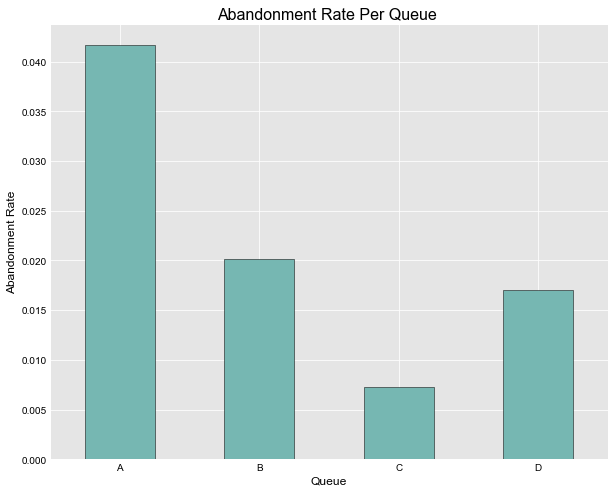

In [181]:
# Create visualization 1 here

### 1. What is the average abandonment rate per queue?

abandonment_rate=((df.groupby("Queue")["Abandoned"].sum()/df.groupby("Queue")["Calls"].sum()))
print(abandonment_rates)
abandonment_rate.plot(kind = 'bar', legend = False, rot=0, color="#76b7b2",ec="Black")
y=abandonment_rate.sum()

plt.title('Abandonment Rate Per Queue ',color = "black",fontsize=16 )
plt.xticks(color = 'black')
plt.yticks(color = 'black')
plt.xlabel('Queue',color = 'black', fontsize=12)
plt.ylabel('Abandonment Rate',color = 'black',fontsize=12)
plt.savefig('bar_vertical.png')

plt.show()

In [ ]:
# Different solution for Question 1. 

# What is the average abandonment rate per queue?
# The dictionary abandonment_rates has the data you need.

abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i] 
# sets key : value pairs for abandonment_rates
    # abandonment rate = abandoned/total calls
# abandonment_rates
    
# plt.bar(range(len(abandonment_rates)), list(abandonment_rates.values()), align='center')
# plt.xticks(range(len(abandonment_rates)), list(abandonment_rates.keys()))

queue=list(abandonment_rates.keys())
rates=list(abandonment_rates.values())
plt.bar(queue,rates,color='royalblue',width=.5)
plt.show()

In [ ]:
# Different solution for Question 1.

# What is the average abandonment rate per queue?
# import mplcyberpunk

# The dictionary abandonment_rates has the data you need.

abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i] # sets key : value pairs for abandonment_rates
    # abandonment rate = abandoned/total calls
    
print(abandonment_rates)

# style.use('cyberpunk')
df_bar = pd.DataFrame(abandonment_rates, index=[0])

ax = df_bar.plot.bar(width = 10, color = ['midnightblue', 'royalblue', 'ghostwhite', 'lightsteelblue'], edgecolor = "white")
plt.title('Abandoned Call Rates by Queue', color = 'white', fontsize = 15)
plt.legend(frameon = True)
plt.xlabel("Queue Group", color = 'white')
plt.ylabel('Abandonment Rate', color = 'white')
plt.xticks([])
plt.yticks(color = 'white')
plt.savefig('bar_vertical.png')

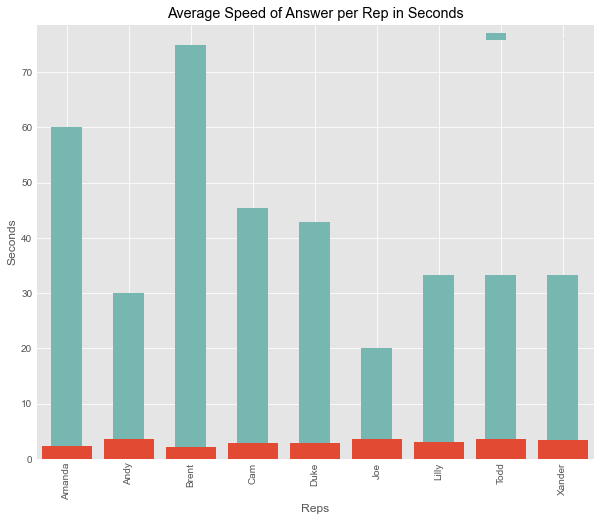

In [194]:
# Create visualization 2 here

# 2. What is the service level and average speed of answer per each rep? 
#average speed of answer = average incoming wait time per rep

# north_plt contains the data you need for the average speed of answer of each rep

north_plt = north_df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()
# south_plt = south_df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index() 

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# # Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = north_df[north_df["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table

# quick_calls_south = south_df[south_df["Incoming Wait Time"] <= 2.0] 
# quick_reps_south = quick_calls_south[["Rep ID", "Calls"]] 
# quick_stats_south = quick_reps_south.groupby(["Rep ID"]).sum() 

# # Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = north_df[north_df["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]  
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

# total_calls_in_south = south_df[south_df["Incoming or Outgoing"] == "Incoming"] 
# rep_calls_south = total_calls_in_south[["Rep ID", "Calls"]]     
# total_stats_south = rep_calls_south.groupby(["Rep ID"]).sum()

# #  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")
#service_level_south = pd.merge(quick_stats_south, total_stats_south, on="Rep ID")

# # Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100
#service_level_south["Service Level %"] = service_level_south["Calls_x"]/service_level_south["Calls_y"] * 100

service_level.plot(y="Service Level %", kind="bar", color=["#76b7b2"])
plt.title('Average Speed of Answer per Rep in Seconds',color="black")
plt.xlabel('Reps')
plt.ylabel('Seconds')

plt.bar(north_plt["Rep ID"], north_plt["Incoming Wait Time"])
plt.show()

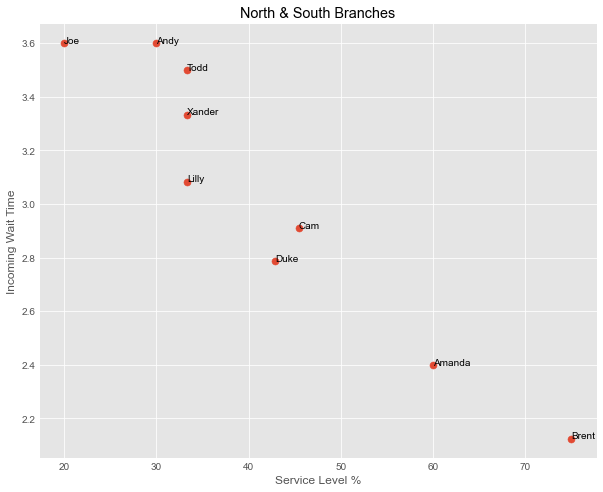

In [195]:
# Different solution for Question 2. 
#scatter plot
style.use('ggplot')
l_merge = pd.merge(north_plt, service_level, on="Rep ID", how="left")

#creating scatter plot
plt.scatter(l_merge['Service Level %'], l_merge['Incoming Wait Time'], s=50)
#adding aesthetics
plt.title('North & South Branches',color="black")
plt.xlabel('Service Level %')
plt.ylabel('Incoming Wait Time')

names = list(l_merge['Rep ID'])
for num, name in enumerate(names):
   plt.annotate(name, (l_merge["Service Level %"][num], l_merge["Incoming Wait Time"][num]),color="black") 

#show plot
plt.show()

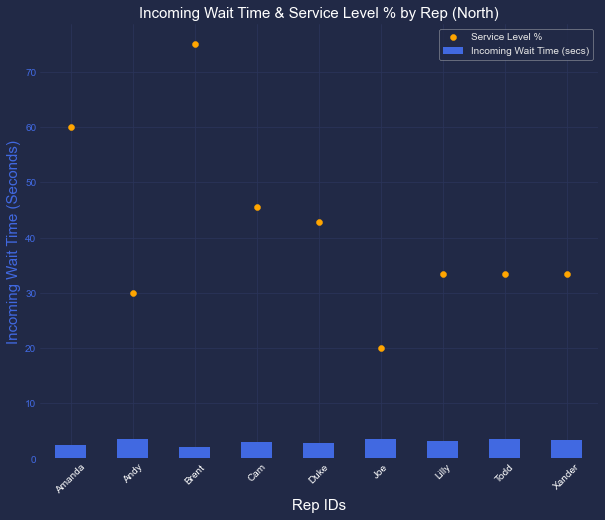

In [186]:
# Different solution for Question 2. 
north_sl_avg = service_level["Service Level %"].mean()
north_plt_service = pd.merge(north_plt, service_level[["Service Level %"]], on = "Rep ID")
north_plt_vis = north_plt.plot(kind = 'bar', color = 'royalblue', ylabel = "incoming wait time")
x = range(len(north_plt['Rep ID']))
y = plt.scatter(x = north_plt['Rep ID'], y = service_level["Service Level %"], color = "orange")
y2 = north_plt['Incoming Wait Time']

labels = north_plt['Rep ID']
plt.title('Incoming Wait Time & Service Level % by Rep (North)', color = "white", fontsize = 15)
plt.legend(['Service Level %', 'Incoming Wait Time (secs)'], loc = 1, frameon = True)
plt.xticks(x, labels, color = 'white', rotation = 45)
plt.yticks(color = 'royalblue')
plt.xlabel('Rep IDs', color = 'white', fontsize = 15)
plt.savefig('bar_vertical.png')
plt.ylabel('Incoming Wait Time (Seconds)', color = 'royalblue', fontsize = 15)
plt.show()


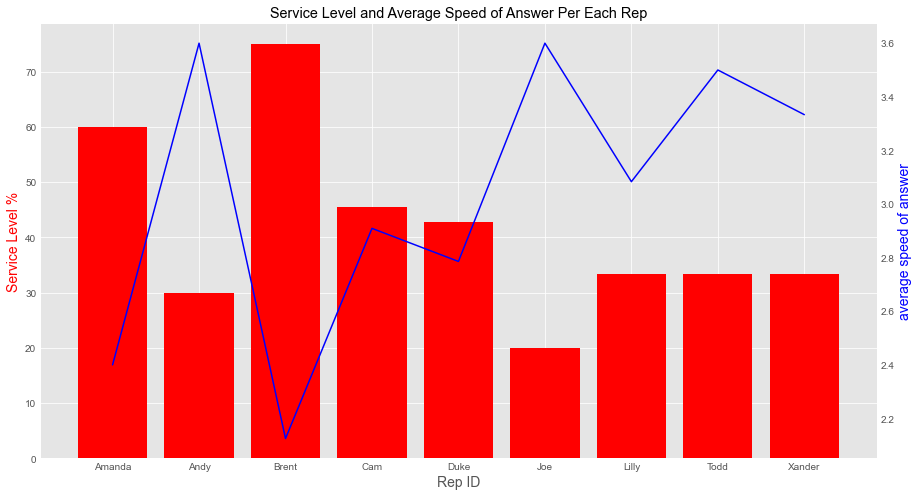

In [202]:
# Different solution for Question 2. 
# Create new table showing both service level and average speed of answer of each rep 
service_speed = pd.merge(service_level, north_plt, on="Rep ID")

# Create visualization 2 here

# dual axis chart

# create figure and axis objects with subplots()
fig = plt.figure(1, figsize=(15,8))
ax = fig.add_subplot()
# make a bar chart to represent service level percentage
barchart = plt.bar(service_speed['Rep ID'], service_speed['Service Level %'], color='red', label='Rep ID')
# set x-axis label
ax.set_xlabel('Rep ID', fontsize=14)
# set y-axis label
ax.set_ylabel('Service Level %', color="red", fontsize=14)
# twin object for two different y-axis on the sample plot
ax2 = ax.twinx()
# make a plot with different y-axis using second axis object
# make a line chart
linechart = plt.plot(service_speed['Rep ID'], service_speed['Incoming Wait Time'], color='blue')
# 2nd y-axis for average speed of answer
ax2.set_ylabel('average speed of answer', color="blue", fontsize=14)
# set chart title
plt.title('Service Level and Average Speed of Answer Per Each Rep', color="black")
plt.grid(False)
plt.show()

In [219]:
# Create visualization 3 here
#For each type of call purpose, how many calls are outgoing vs. incoming?


# The three dictionaries, complaints, sales_support, and product_support, have the information you need
purpose_group = df.groupby("Call Purpose")
purpose_counts = purpose_group["Incoming or Outgoing"].value_counts(ascending=True)
complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()

# plt.bar(range(len(complaints)), list(complaints.values()), align='center')
# plt.xticks(range(len(complaints)), list(complaints.keys()))
# plt.show()

# plt.bar(range(len(sales_support)), list(sales_support.values()), align='center')
# plt.xticks(range(len(sales_support)), list(sales_support.keys()))
# plt.show()

# plt.bar(range(len(product_support)), list(product_support.values()), align='center')
# plt.xticks(range(len(product_support)), list(product_support.keys()))
# plt.show()

Call Purpose     Incoming or Outgoing
Complaint        Incoming                 51
Product Support  Incoming                 82
                 Outgoing                228
Sales Support    Incoming                 75
                 Outgoing                123
Name: Incoming or Outgoing, dtype: int64


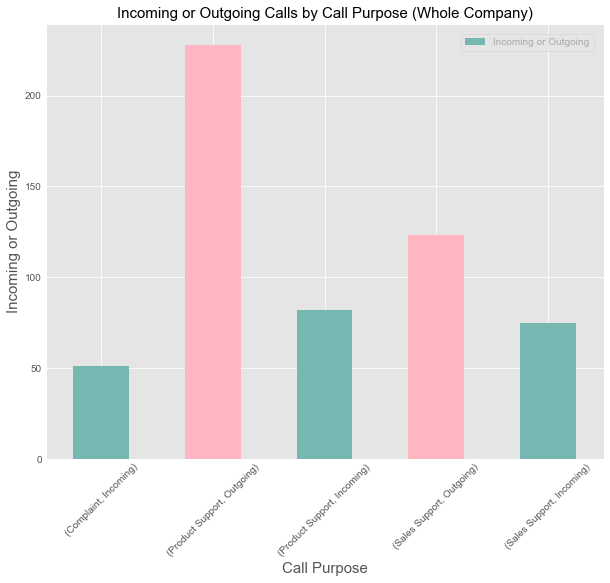

In [206]:
# For each type of call purpose, how many calls are outgoing vs. incoming?

# call_purpose=df.groupby("Incoming or Outgoing")["Call Purpose"].value_counts()
# call_purpose.plot.bar(edgecolor = 'white')
df.groupby("Call Purpose")["Incoming or Outgoing"].value_counts().plot(kind="bar",stacked=True,color=["#76b7b2","lightpink"])
# style.use('ggplot')
plt.title('Incoming or Outgoing Calls by Call Purpose (Whole Company)', fontsize = 15, color="black")
plt.xticks(rotation = 45)
plt.xlabel('Call Purpose', fontsize = 15)
plt.ylabel('Incoming or Outgoing', fontsize = 15) 
plt.legend(frameon = True, borderaxespad = 1, labelcolor="darkgrey" )
plt.show()

<AxesSubplot:xlabel='Call Purpose'>

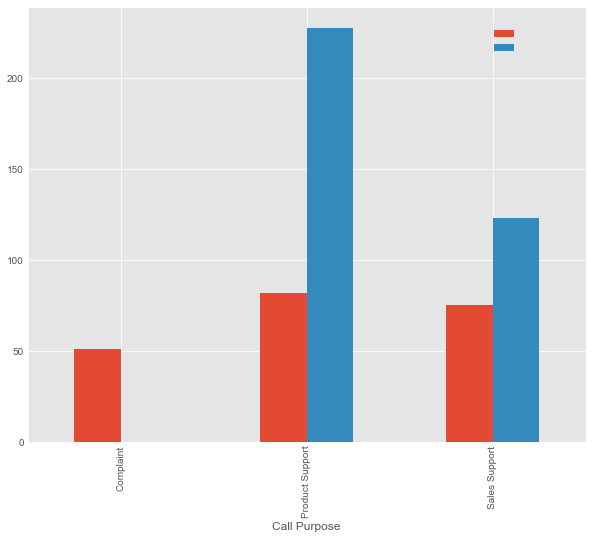

In [216]:
# Different solution for Question 3. 
# grouped bar chart
calls_made = df.groupby("Incoming or Outgoing")["Call Purpose"].value_counts().unstack(0).plot.bar()
calls_made

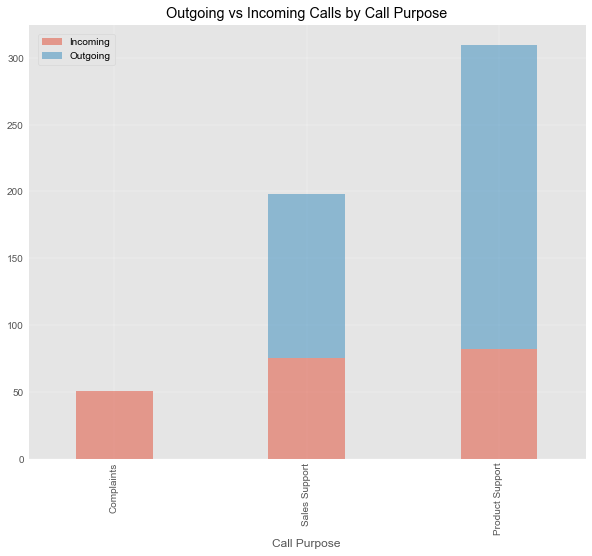

In [229]:
# Different solution for Question 3. 
complaints['Call Purpose'] = 'Complaints'
sales_support['Call Purpose'] = 'Sales Support'
product_support['Call Purpose'] = 'Product Support'
data = [complaints,sales_support,product_support]

# print(list(sales_support.items()))

viz3df = pd.DataFrame(columns=['Call Purpose','Incoming','Outgoing'],data=data)
viz3df.plot.bar(x='Call Purpose',y=['Incoming','Outgoing'],stacked=True,  width = 0.4,alpha=0.5)
plt.title('Outgoing vs Incoming Calls by Call Purpose',color="Black")
plt.legend(frameon = True, borderaxespad = 1, labelcolor="black" )
plt.grid(True, linewidth=0.3)

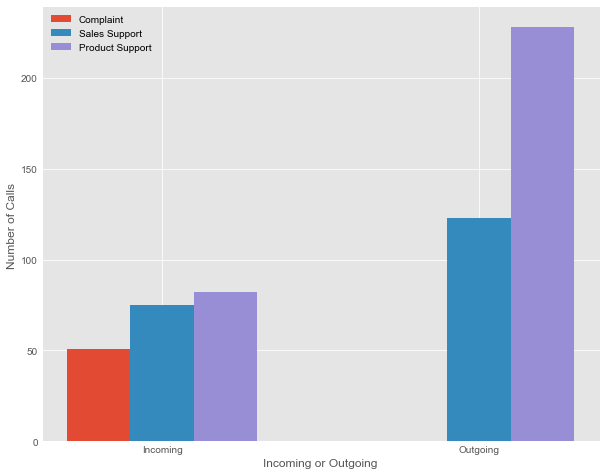

In [215]:
# Different solution for Question 3. 
complaints["Outgoing"]=0
call_purpose=["Complaint","Sales Support","Product Support"]
X=np.arange(len(sales_support))
plt.bar(X-0.2,complaints.values(),width=0.2)
plt.bar(X,sales_support.values(),width=0.2)
plt.bar(X+0.2,product_support.values(),width=0.2)
plt.xticks(X,sales_support.keys())
plt.xlabel("Incoming or Outgoing")
plt.ylabel("Number of Calls ")
plt.legend(call_purpose, labelcolor='black')

### Visualization Results

For each chart you created, explain why you chose the chart style you chose.

1.  I chose to create a bar plot because abandonment rate was being compared across the different queues. 

 I chose to create a bar plot because abandonment rate was being compared across the different queues. 
 
 I prefered Bar chart as it will be easy to compare two values.
 
2. I chose to create a grouped bar plot to look at both service level and avg speed of answer by rep. The lower avg speed results in a higher service level %, which makes sense. 

 To visualize 'service level and average speed of answer per each rep', I chose two different graph types for visual contrast - scatter plot for service level % and bar chart for average speed of answer. I wanted to show the correlation/relationship between service service level and average speed of answer, and the graph reveals an inverse correlation - reps with lower service levels have higher incoming wait times. 
 
 I chose a scatter plot for visualizaiton 2 because I wanted to show the correlation between reps that had the greatest service level and reps that had the lowest incoming wait time. From the plot, you can clearly see that service level is higher when the reps respond faster. I can also see where most of the reps are grouped in terms of service level and incoming wait time. More than half the reps for the north call center have <50% service level.
 
3.  I chose to create a stacked bar chart to compare the incoming and outgoing calls by call purpose. The incoming calls are blue and the outgoing calls are orange.

 To visualize how many calls are outgoing vs. incoming for each call purpose, I chose a color-coded stacked bar chart. This helps viewers compare the composition of different call types.

 I chose the Stacked Bar type to show the total number of calls by call purpose and to show whether it's incoming or outgoing at once in one column.
 

## Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.

1. Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?

The South Branch is operating more efficiently. The South Branch has a lower average abandonment rate of 1.27% compared to 2.86% for the North Branch. The South Branch also has a service level of 38.1% of calls answered within 2 seconds compared to the 40.24% of calls by the North Branch. The average speed of answer was comparable with 3.0 s at the South Branch compared to the 3.049 s at the North Branch.

Although the North Branch has higher service levels (40.24 %, as opposed to 38.1 % at South Branch), overall call abandonment rates are higher at the North Branch (2.86 %, as opposed to 1.27 % at South Branch). The North Branch also has a lower percentage of calls answered within 2 seconds. Overall, KPIs indicate the South Branch is operating more efficiently.

2. Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?

 Although both branches have different numbers of reps (9 reps in North, 11 reps in South), the average prep times* and the average speed of answer time* are very similar. It tells me all reps are working quickly regardless of the total number of reps in each branch. Therefore I would hire more reps in the North branch because they have less number of reps currently.
 
 South Branch has 11 reps and North only has 9. The KPIs indicate that the North Branch would benefit from extra help.
 
 Number of Rep in North Call center are 9 and total calls handled by North call center is 245. Average calls handled by each Rep in North call center is 27.2. Number of Rep in South Call center are 11 and total calls handled by South call center is 314. Average calls handled by each Rep in South call center is 28.5.Average calls handled by each Rep in both center is not having much differenece. But since North Call center is have less Reps and they have low average speed of answer adding more employees to North call center will make center to perform more better and increased KPI values.
 
 
3. Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

 Customer satisfaction - after calls, customers should have the opportunity to fill out a survey indicating how satisfied they were with the service. A column containing a numeric customer satisfaction rating (e.g. 0 for 'highly dissatisfied' to 5 for 'highly satsfied') for each call would be useful.

## Submit Your Work

After you have completed your work on the assignment, push your work to your Github repo. Navigate to the repo, copy the link to your assignment and paste the URL in the Canvas assignment's submission box. 

## Bonus Mission

Create a visualization that answers this question:

1. For each call purpose, how many calls (incoming and outgoing) take place in each time block?

In [233]:
# Create your visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]
call_times

# Use groupby to plot based on time blocks:

# Use groupby and get_group to select which call purpose to plot:


,Time Block,Call Purpose,Incoming or Outgoing,Calls
0,9:00 AM,Complaint,Incoming,1
1,11:00 AM,Sales Support,Incoming,1
2,11:00 AM,Sales Support,Incoming,1
3,4:00 PM,Sales Support,Incoming,1
4,12:00 PM,Product Support,Incoming,1
...,...,...,...,...
309,5:00 PM,Product Support,Outgoing,1
310,5:00 PM,Product Support,Outgoing,1
311,5:00 PM,Product Support,Outgoing,1
312,5:00 PM,Product Support,Outgoing,1


In [234]:
time_list = []
for time in call_times["Time Block"]:
    if time not in time_list:
        time_list.append(time)
        
time_list.sort()
time_list.insert(0, time_list.pop()) #this arranges the list in order 9am - 5pm
print(time_list)

['9:00 AM', '10:00 AM', '11:00 AM', '12:00 PM', '1:00 PM', '2:00 PM', '3:00 PM', '4:00 PM', '5:00 PM']


In [235]:
c_totals = []
ss_totals = []
ps_totals = []

for time in time_list:
    df_test = df[df["Time Block"] == time]
    df_test = df_test[df_test["Call Purpose"] == "Complaint"]
    c_totals.append(df_test["Calls"].sum())
    
for time in time_list:
    df_test = df[df["Time Block"] == time]
    df_test = df_test[df_test["Call Purpose"] == "Sales Support"]
    ss_totals.append(df_test["Calls"].sum())
    
for time in time_list:
    df_test = df[df["Time Block"] == time]
    df_test = df_test[df_test["Call Purpose"] == "Product Support"]
    ps_totals.append(df_test["Calls"].sum())

In [236]:
df_times = pd.DataFrame({"Time Block" : time_list,
                        "Complaints" : c_totals,
                        "Sales Support" : ss_totals,
                        "Product Support" : ps_totals})
df_times = df_times.set_index("Time Block")

In [237]:
df_times

,Complaints,Sales Support,Product Support
Time Block,,,
9:00 AM,5,0,5
10:00 AM,6,73,20
11:00 AM,3,27,26
12:00 PM,11,49,60
1:00 PM,6,18,16
2:00 PM,5,10,50
3:00 PM,6,6,61
4:00 PM,3,10,40
5:00 PM,6,5,32


Text(0.5, 1.0, 'Number Of Call Types Per Time Block')

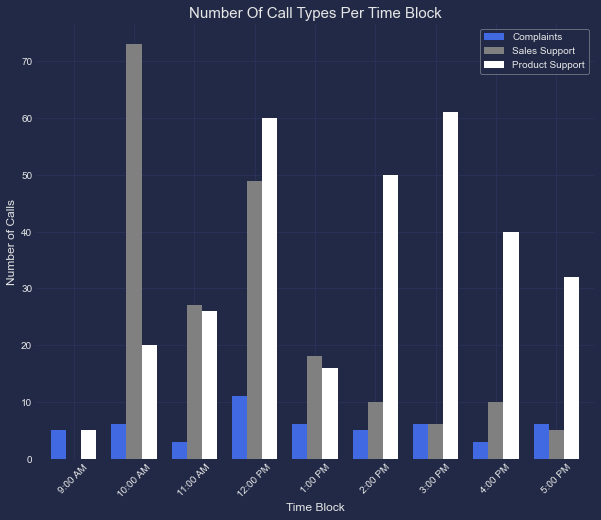

In [239]:
style.use('cyberpunk')
ax = df_times.plot.bar(rot=45, color = ['royalblue', 'gray', 'white'], width = .75, ylabel = "Number of Calls")
plt.legend(frameon = True, loc = 'best')
plt.title("Number Of Call Types Per Time Block", fontsize = 15)